In [304]:
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [305]:
# Task 1
X = norm(loc=175, scale=8) # loc is excepted value, scale is standard deviation
X.rvs(10)

array([164.83355908, 160.74651962, 185.93356037, 160.50178693,
       179.99102636, 171.45210168, 169.50582379, 187.96752911,
       169.13237423, 169.89945455])

In [306]:
1 - X.cdf(180)

0.26598552904870054

In [307]:
# Task 2
z = (180-175)/8
z

0.625

In [308]:
# Task 3
X = norm(loc=0, scale=1) # loc is excepted value, scale is standard deviation
1 - X.cdf(0.625)

0.26598552904870054

In [309]:
# task 5
x = [182, 184, 166, 160, 190, 175, 174, 183, 170]

In [310]:
X = norm(loc=175, scale=8/3) # loc is excepted value, scale is standard deviation

In [311]:
1- X.cdf(176)

0.35383023332727626

In [312]:
# Lecture
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [313]:
sample_size = 10
pop_mean = 0.5 # sample (population) mean
iterations = 10000
tvalues = []

for i in range(iterations):
    sample = np.random.uniform(0, 1, sample_size) # not normal distribution
    t = ((np.mean(sample) - pop_mean) /
          np.sqrt(np.var(sample, ddof=1)) * 
          np.sqrt(sample_size)) # ddof=1 means that variance is unbiased
    tvalues.append(t)

In [314]:
sample

array([0.31704699, 0.82725636, 0.52700331, 0.11854768, 0.43768815,
       0.17518675, 0.69457026, 0.32052693, 0.77734171, 0.36720938])

(-7.0, 7.0)

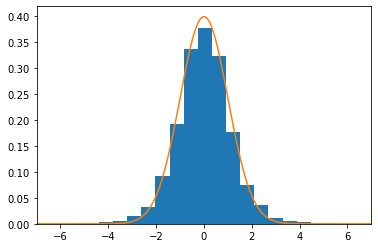

In [315]:
# Normal distribution - does not work well for small sample sizes - differs from T for x away from center.

plt.hist(tvalues, bins=30, density=True);
x = np.linspace(-7, 7, 200)
plt.plot(x, scipy.stats.norm.pdf(x))
plt.xlim(-7, 7)

(-7.0, 7.0)

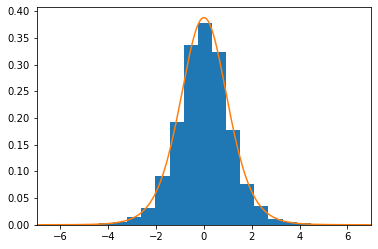

In [316]:
# T-distribution
plt.hist(tvalues, bins=30, density=True);
x = np.linspace(-7, 7, 200)
plt.plot(x, scipy.stats.t.pdf(x, df=sample_size - 1)) # df - degrees of freedom, depends on sample size
plt.xlim(-7, 7)

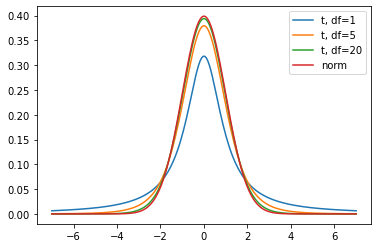

In [317]:
# t distribution has heavier tails than normal
# when degrees of freedom are large then t-distribution is close to normal

plt.plot(x, scipy.stats.t.pdf(x, df=1), label='t, df=1')
plt.plot(x, scipy.stats.t.pdf(x, df=5), label='t, df=5')
plt.plot(x, scipy.stats.t.pdf(x, df=20), label='t, df=20')
plt.plot(x, scipy.stats.norm.pdf(x), label='norm')
plt.legend()

In [318]:
# Lectures
from scipy.stats import ttest_1samp

In [319]:
# based on the result of t-test we can reject Ho (mu0=3)in favor of H1(mu0 != 3)
# sample came from distribution whose mean is not equal to 3.
# becasue (0.05 (alpha ) - p value) is positive we can say that mean should be larger than 3.

sample = [3, 5, 4, 6, 2, 3, 4, 5, 5, 4]
mu0 = 3
ttest_1samp(sample, mu0)

Ttest_1sampResult(statistic=2.905487990874558, pvalue=0.01743886090834335)

In [320]:
t_obs = ((np.mean(sample) - mu0) / np.std(sample, ddof=1)) * np.sqrt(len(sample)) #same value as statistics above
print(t_obs)

2.9054879908745583


In [321]:
x = np.linspace(-5, 5, 200)

In [322]:
from scipy.stats import t

In [323]:
T = t(df=(len(sample) - 1))

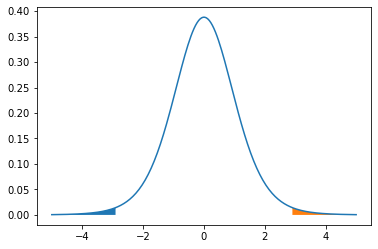

In [324]:
plt.plot(x, T.pdf(x))
x_left = np.linspace(-5, -t_obs, 200)
x_right = np.linspace(t_obs, 5, 200)
plt.fill_between(x_left, T.pdf(x_left)) # sum of these 2 is equal to p value
plt.fill_between(x_right, T.pdf(x_right)) # sum of these 2 is equal to p value

In [325]:
T.cdf(-t_obs) * 2 # this is p value - same as second result of ttest function

0.017438860908343328

In [326]:
# using simulations to test t-test
# check how many times we would make type 1 error using t-test
sample_size = 10
iterations = 10000
significance_level = 0.05
fp_counter = 0

for i in range (iterations):
    sample = np.random.normal(size=sample_size)
    t_stat, pvalue = ttest_1samp(sample, 0) # 0 is expected value of standard distribution
    
    if pvalue < significance_level:
        fp_counter += 1
print(fp_counter / iterations)  # this is false positive rate-should be less or equal to significance level-ttest works as expected

0.0472


In [327]:
# try with not normal distribution 

sample_size = 3 # on small sample - false positive rate is higher than 5%. with increased sample size we will get closer to 5%
iterations = 10000
significance_level = 0.05
fp_counter = 0

for i in range (iterations):
    sample = np.random.uniform(low=-1, high=1, size=sample_size)
    t_stat, pvalue = ttest_1samp(sample, 0) # 0 is expected value of -1 to 1 uniform distribution
    
    if pvalue < significance_level:
        fp_counter += 1
print(fp_counter / iterations)

0.0732


In [328]:
# try with discrete distribution

sample_size = 50
iterations = 10000
significance_level = 0.05
fp_counter = 0

# if we add outlier (1000) - we will get higher than 5% error rate - becasue it is too away from normal distribution
# make it closer to 5% - incrse sample size to 500
# you can take log of data to reduce discrepancies - this is done to test income samples

population = [2 , 3, 4, 1, 2.2, 3.3, 4.4, 6.6, 1000] 

for i in range (iterations):
    sample = np.random.choice(population, size=sample_size)
    t_stat, pvalue = ttest_1samp(sample, np.mean(population)) 
    
    if pvalue < significance_level:
        fp_counter += 1
print(fp_counter / iterations)

0.0792


In [329]:
# One tailed t-test
# H0: mu = mu0 and H1: mu > mu0
# divide pvalue by 2 to find one tailed result

sample_size = 10
iterations = 10000
significance_level = 0.05
fp_counter = 0

for i in range (iterations):
    sample = np.random.normal(size=sample_size)
    t_stat, pvalue = ttest_1samp(sample, 0) # 0 is expected value of standard distribution
    pvalue = pvalue / 2 #one tail
    
    if t_stat > 0 and pvalue < significance_level: # check that t_stats is positive
        # reject H0
        fp_counter += 1
print(fp_counter / iterations)

0.0497


In [330]:
# Quiz 1

1 - t.cdf(3, df=4)

0.019970984035859396

In [331]:
1 - t.cdf(-3, df=4)

0.9800290159641406

In [332]:
# Quiz 2

sample = [165, 170, 175, 180, 185, 185, 190, 195, 200, 210]
mu0 = 175
ttest_1samp(sample, mu0)

Ttest_1sampResult(statistic=2.400108850942297, pvalue=0.039890766746082586)

In [333]:
t_obs = ((np.mean(sample1) - mu0) / np.std(sample1, ddof=1)) * np.sqrt(len(sample1))
print(t_obs)

-226.24178400018465


In [334]:
(1 - t.cdf(1.9, df=24))*2

0.06951310490361085

In [335]:
# Quiz 2
sample = [11,14,15,14,14]
mu0 = 12
t_obs, pvalue = ttest_1samp(sample, mu0)
print(pvalue)
print(pvalue / 2)

0.0777416409478998
0.0388708204739499


In [336]:
sample = [8,12,10,12,9]
mu0 = 12
t_obs, pvalue = ttest_1samp(sample, mu0)
print(t_obs)
print(pvalue)
(1 - pvalue) + (pvalue / 2)

-2.250000000000001
0.08764517650339458


0.9561774117483027

In [337]:
from scipy.stats import ttest_ind
sample1=[2,4,6,1,3,1,4]
sample2=[3,6,2,5,7,7]
ttest_ind(sample1, sample2, equal_var=True)

Ttest_indResult(statistic=-1.8397324220155997, pvalue=0.09292661405651291)

In [338]:
# lectures two-sample t-test
from scipy.stats import ttest_ind

In [339]:
sample1 = [3,4,5,4,6,7]
sample2 = [10, 8,4,20, 6, 50,23,2]

In [340]:
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-1.6077865540475678, pvalue=0.13385879249866536)

In [341]:
ttest_ind(sample1, sample2, equal_var=False) # if variances of two sample are very different

Ttest_indResult(statistic=-1.8707921599718762, pvalue=0.10261249372000565)

In [342]:
# Quiz
sample1 = [47, 48, 51, 52, 52, 50, 47, 46, 52, 48, 49, 55, 52, 49, 52, 47, 50, 53, 48, 52]
sample2 = [60, 58, 61, 61, 54, 57, 59, 63, 60, 61]
ttest_ind(sample1, sample2, equal_var=False)

Ttest_indResult(statistic=-9.623189997698113, pvalue=1.9624057660484677e-08)

In [343]:
X = norm(loc=0, scale=np.sqrt(5/100)) # loc is excepted value, scale is standard deviation

In [344]:
x_obs = scipy.stats.norm.ppf(0.95, loc=0, scale=np.sqrt(5/100))
print(x_obs)

0.3678004522900572


In [345]:
scipy.stats.norm.cdf(x_obs, loc=0, scale=np.sqrt(5/100))

0.95

In [346]:
scipy.stats.norm.cdf(x_obs, loc=0.5, scale=np.sqrt(5/100))

0.2771884043107984

In [347]:
1 - scipy.stats.norm.cdf(x_obs, loc=0.5, scale=np.sqrt(5/100))

0.7228115956892016

In [348]:
1 - scipy.stats.norm.cdf(x_obs, loc=1, scale=np.sqrt(5/100))

0.9976527540587823

In [358]:
# Quiz
sample1 = [300, 320, 200, 700]
sample2 = [350, 370, 240, 750]
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-0.3038412337952006, pvalue=0.7715100414727278)

In [353]:
stats, pval = ttest_ind(sample1, sample2, equal_var=False)

In [354]:
1 - pval

0.22848839591355297

In [359]:
sample3= [50,50,40,50]
ttest_1samp(sample3, 0.0)

Ttest_1sampResult(statistic=19.0, pvalue=0.00031834344007115753)

In [357]:
scipy.stats.ttest_rel(sample1, sample2)

Ttest_relResult(statistic=-19.0, pvalue=0.00031834344007115753)

In [374]:
# SGA Week 4

control = [6, 7, 7, 5, 7, 8, 8, 7, 7, 7]
treat = [7, 6, 6, 5, 5, 6, 7, 5, 5, 8]

ttest_ind(control, treat)

Ttest_indResult(statistic=2.076923076923078, pvalue=0.05240200640713197)

In [371]:
np.array(control)
np.mean(control)

6.9

In [372]:
np.array(treat)
np.mean(treat)

6.0